In [38]:
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import folium

from wordcloud import WordCloud
from collections import Counter

import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns

import circlify


### Short names used across the project

In [39]:
df = pd.read_csv("data/points_table.csv")
short_names = {}

for row in df.iterrows():
    short_names.update({row[1]["name"]:row[1]["short_name"]})
short_names

{'Mumbai Indians': 'MI',
 'Delhi Capitals': 'DC',
 'Sunrisers Hyderabad': 'SRH',
 'Royal Challengers Bangalore': 'RCB',
 'Kolkata Knight Riders': 'KKR',
 'Kings XI Punjab': 'KXIP',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Gujarat Lions': 'GL',
 'Pune Warriors': 'PWI',
 'Deccan Chargers': 'SRH',
 'Kochi Tuskers Kerala': 'Kochi'}

### Team Logos

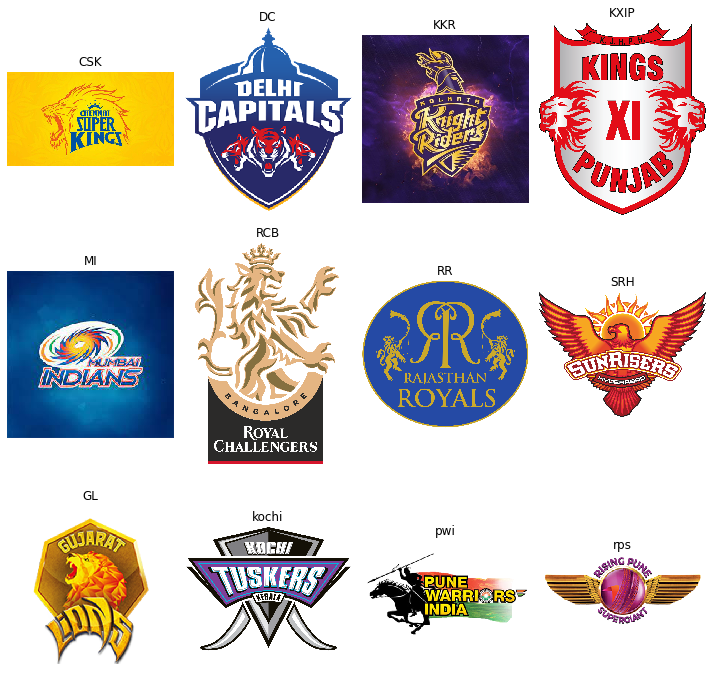

In [97]:
team_logos = {}
team_logos['CSK'] = "team_logos/csk.jpg"
team_logos['DC'] = "team_logos/dc.png"
team_logos['KKR'] = "team_logos/kkr.jpg"
team_logos['KXIP'] = "team_logos/kxip.png"
team_logos['MI'] = "team_logos/mi.jpg"
team_logos['RCB'] = "team_logos/rcb.png"
team_logos['RR'] = "team_logos/rr.png"
team_logos['SRH'] = "team_logos/srh.png"
team_logos['GL'] = "team_logos/gl.png"
team_logos['kochi'] = "team_logos/kochi.png"
team_logos['pwi'] = "team_logos/pwi.png"
team_logos['rps'] = "team_logos/rps.png"

fig = plt.figure(figsize=(5, 5))
fig.set_size_inches(10,10)

plt.subplots_adjust(wspace= 0, hspace= 0)
rows = 3
columns=4
position=1
for team in team_logos:
    fig.add_subplot(rows,columns,position)
    image = plt.imread(team_logos[team])
    plt.imshow(image, interpolation='nearest')
    plt.title(team)
    plt.axis('off')
    position+=1
    
plt.tight_layout()

### Locate all the venues 

In [40]:
df = pd.read_csv("data/all_season_batting_card.csv")

In [41]:
all_venues = df["venue"].unique()

In [42]:
venue_dict = {venue:venue for venue in all_venues}

In [43]:
venue_dict.update({"MA Chidambaram Stadium, Chepauk, Chennai":"MA Chidambaram Stadium, Chennai",
                  "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh":"Bindra Stadium, Mohali",
                  "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam":"Dr YS Rajasekhara Reddy Cricket Stadium, Visakhapatnam",
                  "Dr DY Patil Sports Academy, Mumbai":"Dr DY Patil Stadium",
                  "Vidarbha Cricket Association Stadium, Jamtha, Nagpur":"Vidarbha Cricket Association Stadium, Nagpur",
                  "The Wanderers Stadium, Johannesburg":"Wanderers Stadium, Johannesburg",
                  "Mangaung Oval, Bloemfontein":"Springbok Park, Bloemfontein" })


In [44]:
venue_dict.values()

dict_values(['Sheikh Zayed Stadium, Abu Dhabi', 'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chennai', 'Eden Gardens, Kolkata', 'Wankhede Stadium, Mumbai', 'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi', 'M.Chinnaswamy Stadium, Bengaluru', 'Rajiv Gandhi International Stadium, Uppal, Hyderabad', 'Bindra Stadium, Mohali', 'Dr YS Rajasekhara Reddy Cricket Stadium, Visakhapatnam', 'Maharashtra Cricket Association Stadium, Pune', 'Holkar Cricket Stadium, Indore', 'Saurashtra Cricket Association Stadium, Rajkot', 'Green Park, Kanpur', 'Shaheed Veer Narayan Singh International Stadium, Raipur', 'Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad', 'Brabourne Stadium, Mumbai', 'JSCA International Stadium Complex, Ranchi', 'Barabati Stadium, Cuttack', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Nehru Stadium, Kochi', 'Dr DY Patil Stadium', 'Vidarbha Cricket Association Stadium, Nagpur', 'Newlands, Cape Town', "St Geo

In [45]:
loc = Nominatim(user_agent="GetLoc")
  
venue_map = folium.Map(tiles="Stamen Terrain")
# venue_map = folium.Map(tiles="OpenStreetMap")
tooltip = "Click Here For Location"


for venue in venue_dict.values(): 
    getLoc = loc.geocode(venue)
#     print("stadium",venue, getLoc)

    marker = folium.Marker(
        location=[getLoc.latitude, getLoc.longitude],
        popup = venue,
        tooltip=tooltip)
    
    marker.add_to(venue_map)
venue_map.save(outfile= "images/all_venues.html")
venue_map

## Home Grounds for each team

In [46]:
df = pd.read_csv("data/all_season_summary.csv")
df = df.loc[~df['home_team'].isin(["Kochi", "PWI", "RPS", "GL"])]
df = df.loc[~df['away_team'].isin(["Kochi", "PWI", "RPS", "GL"])]
df = df[df["season"]==2008]
home_grounds = {}
for row in df.iterrows():
    row_data= row[1]
    if row_data['home_team'] not in home_grounds:
        home_grounds.update({row_data['home_team']:venue_dict[row_data['venue_name']]})
print(home_grounds)

{'RCB': 'M.Chinnaswamy Stadium, Bengaluru', 'KXIP': 'Bindra Stadium, Mohali', 'DC': 'Arun Jaitley Stadium, Delhi', 'KKR': 'Eden Gardens, Kolkata', 'MI': 'Wankhede Stadium, Mumbai', 'RR': 'Sawai Mansingh Stadium, Jaipur', 'SRH': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad', 'CSK': 'MA Chidambaram Stadium, Chennai'}


In [47]:
loc = Nominatim(user_agent="GetLoc")
  
home_grounds_map = folium.Map(tiles="OpenStreetMap")
# venue_map = folium.Map(tiles="Stamen Terrain")
tooltip = "Click Here For Location"

for team, venue in home_grounds.items(): 
    getLoc = loc.geocode(venue)
    marker = folium.Marker(
        location=[getLoc.latitude, getLoc.longitude],
        popup = venue,
        tooltip=team)
    marker.add_to(home_grounds_map)
home_grounds_map.save(outfile= "images/home_grounds.html")
home_grounds_map

## Teams Position across seasons using the bump chart

In [48]:
teams_positions_df = pd.read_csv("data/points_table.csv")
teams_positions_df['short_name'].unique()

array(['MI', 'DC', 'SRH', 'RCB', 'KKR', 'KXIP', 'CSK', 'RR', 'RPS', 'GL',
       'PWI', 'Kochi'], dtype=object)

Text(0, 0.5, 'Rank')

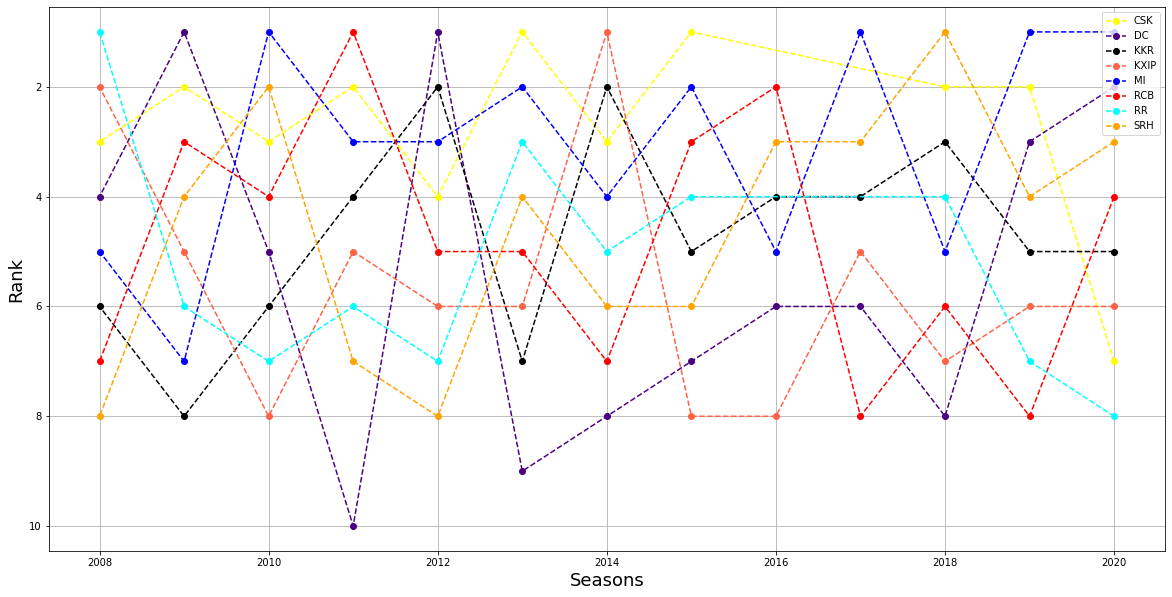

In [49]:
teams_positions_df = teams_positions_df.loc[~teams_positions_df['short_name'].isin(["Kochi", "PWI", "RPS", "GL"])]
plt.figure(figsize = (20, 10))
plt.grid()
color_map = {'CSK':'yellow', 'MI':'blue', 'KKR':'black', 'DC':'indigo', 'SRH':'orange', 'RCB':'red', 'RR':'cyan', 'KXIP':'tomato'}
for i, j in teams_positions_df.groupby("short_name"):
    plt.plot("season", "rank", "o--", data=j, color = color_map[i], label=i)
plt.legend(loc="upper right")
plt.gca().invert_yaxis()
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Rank', fontsize=18)

## Team position across seasons using heatmap

<AxesSubplot:xlabel='season', ylabel='short_name'>

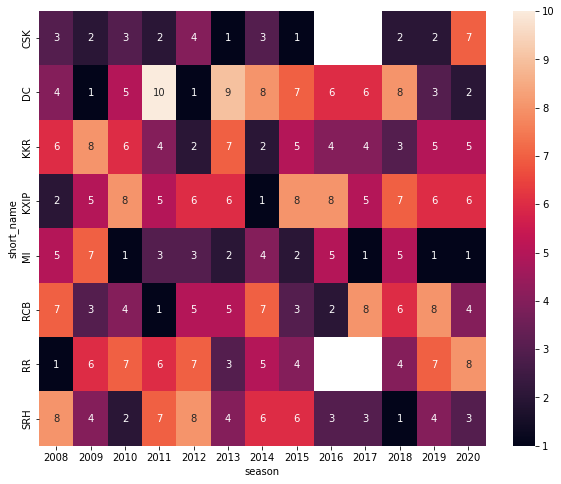

In [50]:
fig, ax = plt.subplots(figsize=(10,8))
points_table = pd.read_csv("data/points_table.csv")
updated_points_table = points_table.loc[~points_table['short_name'].isin(["Kochi", "PWI", "RPS", "GL"])]
updated_points_table = updated_points_table.pivot("short_name", "season", "rank")
sns.heatmap(updated_points_table, annot=True, ax=ax)

### Lets visualize the teams with more wins using world cloud

In [51]:
matches_summary = pd.read_csv("data/all_season_summary.csv")
matches_summary.groupby(['season'])
winners = matches_summary['winner'].tolist()

In [52]:
winners_count = Counter(winners)
winners_count

Counter({'CSK': 107,
         'DC': 86,
         'RCB': 91,
         'RR': 81,
         'MI': 120,
         'KXIP': 88,
         'KKR': 99,
         'SRH': 95,
         'No Result': 11,
         'RPS': 15,
         'GL': 13,
         'PWI': 12,
         'Kochi': 6})

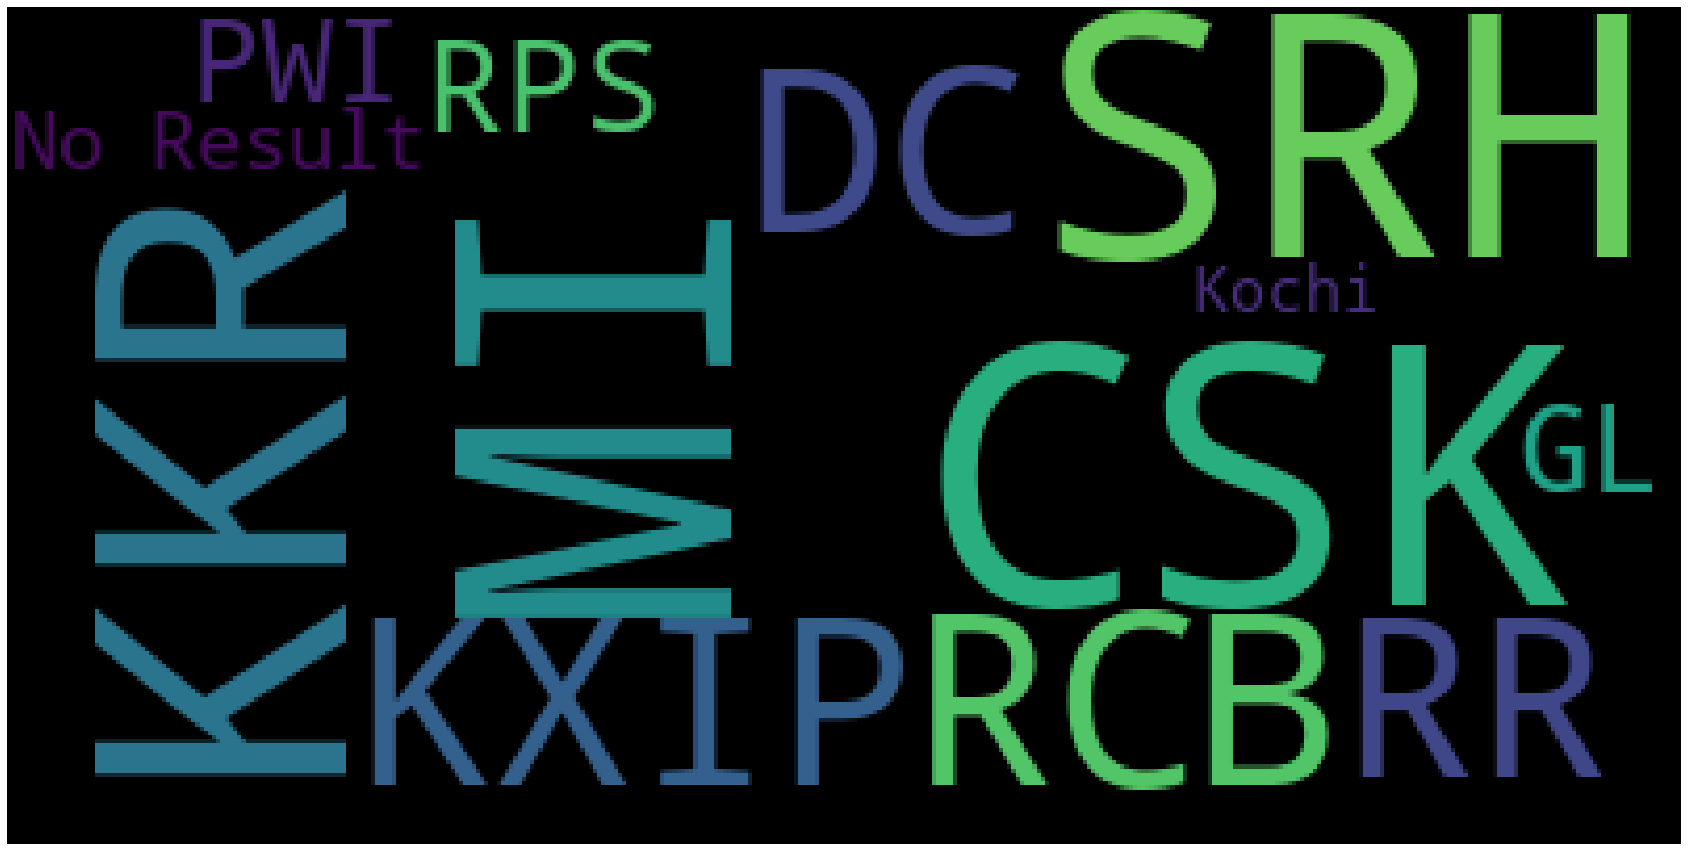

In [53]:
wordcloud = WordCloud().generate_from_frequencies(winners_count)

plt.figure(figsize = (30, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### No of wins by each team in each season

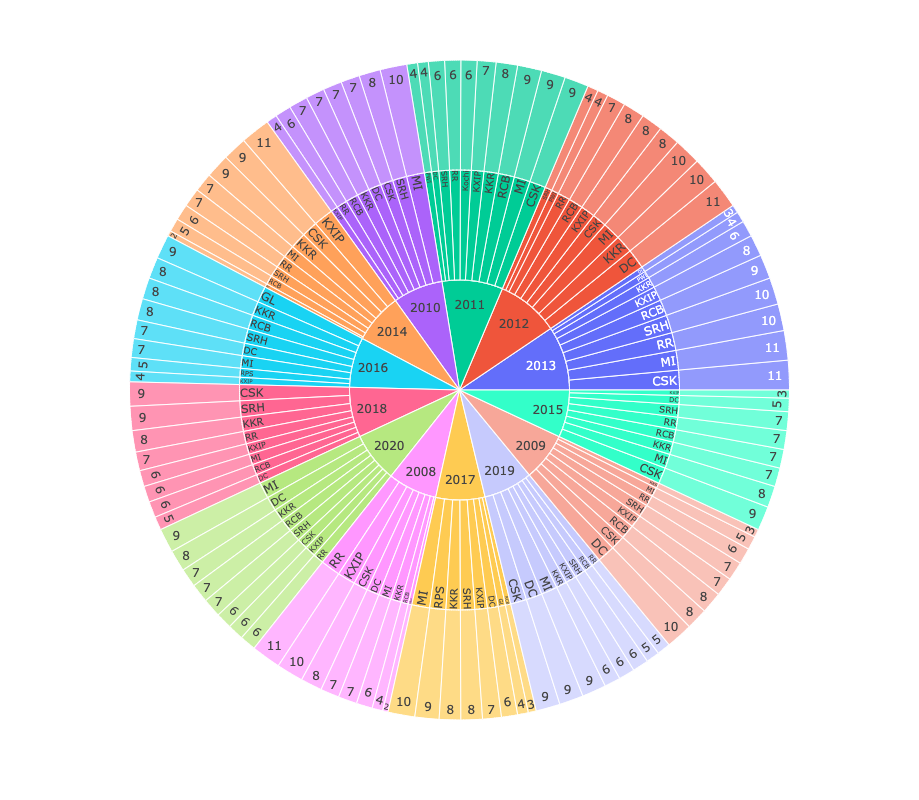

In [54]:
points_table_df = pd.read_csv("data/points_table.csv")

fig = px.sunburst(points_table_df, path=['season', 'short_name', 'matcheswon'], values='matcheswon', height=800, width=800)
fig.show()

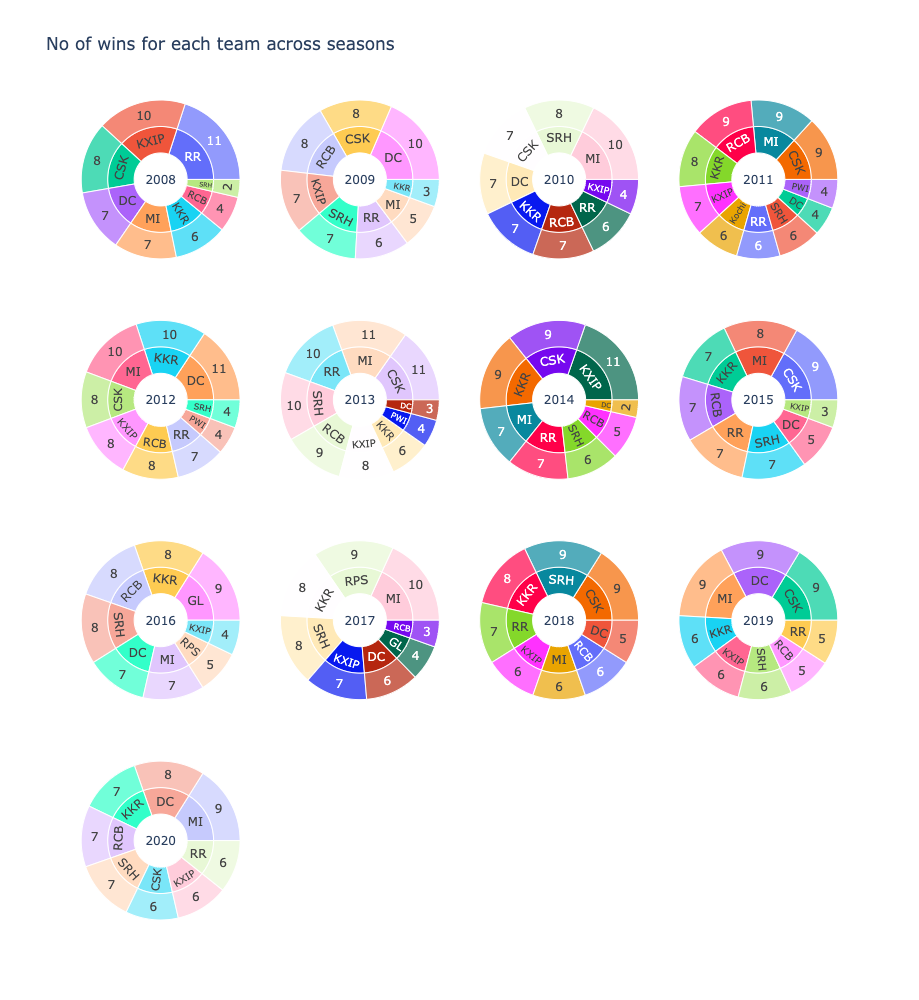

In [55]:
points_table_df = pd.read_csv("data/points_table.csv")
season_matches = {}
for season, data in points_table_df.groupby('season'):
    season_matches[season] = data

rows = 4
columns = 4
plot = []
fig = make_subplots(rows=rows, cols=columns, specs=[[{"type": "sunburst"}]*4]*4)

for season in season_matches:
    plot.append(px.sunburst(season_matches[season], path=['season', 'short_name', 'matcheswon'], values='matcheswon', title=f"{season}"))

index = 0
for each_row in range(rows):
    for each_column in range(columns):
        if len(plot)>index:
            fig.add_trace(plot[index].data[0], row=each_row+1, col=each_column+1)
            index+=1
fig.update_layout(height=1000, width=1000, title_text="No of wins for each team across seasons")
fig.show()

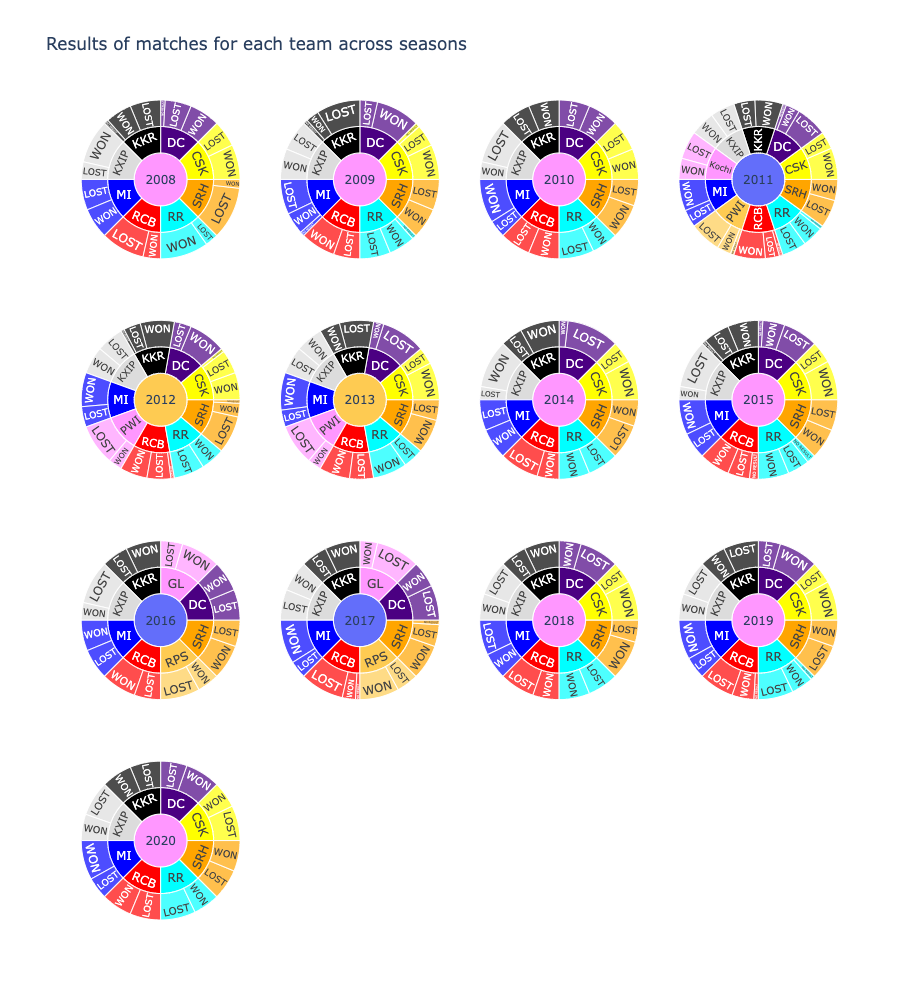

In [56]:
points_table_df = pd.read_csv("data/points_table.csv")
updated_table_df = pd.DataFrame({'season' : [], 'short_name' : [], 'win_or_loss' : [], 'no_of_matches':[]})

new_data_index = 0
for row, data in points_table_df.iterrows():
    updated_table_df.loc[new_data_index] = [str(data['season']), data['short_name'],"WON", data['matcheswon']]
    new_data_index+=1
    updated_table_df.loc[new_data_index] = [str(data['season']), data['short_name'], "LOST", data['matcheslost']]
    new_data_index+=1
    if data['noresult']:
        updated_table_df.loc[new_data_index] = [str(data['season']), data['short_name'], "NO RESULT", data['noresult']]
        new_data_index+=1
updated_table_df

season_matches = {}
for season, data in updated_table_df.groupby('season'):
    season_matches[season] = data

rows = 4
columns = 4
plot = []
fig = make_subplots(rows=rows, cols=columns, specs=[[{"type": "sunburst"}]*4]*4)
color_discrete_map={'CSK':'yellow', 'MI':'blue', 'KKR':'black', 'DC':'indigo', 'SRH':'orange', 'RCB':'red', 'RR':'cyan', 'KXIP':'Gainsboro'}

for season in season_matches:
    plot.append(px.sunburst(season_matches[season], path=['season', 'short_name', 'win_or_loss'], values='no_of_matches', title=f"{season}",color='short_name', color_discrete_map=color_discrete_map))

index = 0
for each_row in range(rows):
    for each_column in range(columns):
        if len(plot)>index:
            fig.add_trace(plot[index].data[0], row=each_row+1, col=each_column+1)
            index+=1
fig.update_layout(height=1000, width=1000, title_text="Results of matches for each team across seasons")
fig.show()

### Highest Percentage of wins of a team

In [57]:
all_season_summary = pd.read_csv("data/all_season_summary.csv")

teams_no_of_wins = {}
teams_no_of_wins = pd.DataFrame({'team' : [], 'total_matches_played' : [],"total_matches_won":[], 'total_matches_toss_won' : [], 'winner_when_toss_won':[], 'win_on_home_grounds':[], 'total_matches_played_in_home_ground':[]})
new_data_index = 0
for team in short_names.values():
    if team not in ["RPS", "GL", "PWI", "Kochi"]:
        total_matches_played = len(all_season_summary[(all_season_summary['home_team']==team) | (all_season_summary['away_team']==team)])
        total_matches_toss_won = len(all_season_summary[(all_season_summary['toss_won']==team)])
        winner_when_toss_won = len(all_season_summary[(all_season_summary['toss_won']==team) & (all_season_summary['winner']==team)])
        total_matches_won = len(all_season_summary[(all_season_summary['winner']==team)])
        total_matches_played_in_home_ground = len(all_season_summary[(all_season_summary['home_team']==team)])
        win_on_home_grounds = len(all_season_summary[(all_season_summary['home_team']==team) & (all_season_summary['winner']==team)])
        teams_no_of_wins.loc[new_data_index] = [team, total_matches_played,total_matches_won, total_matches_toss_won, winner_when_toss_won, win_on_home_grounds, total_matches_played_in_home_ground]
        new_data_index+=1

teams_no_of_wins

team  total_matches_played  total_matches_won  total_matches_toss_won  \
0    MI                 204.0              120.0                   106.0   
1    DC                 195.0               86.0                   100.0   
2   SRH                 201.0               95.0                   100.0   
3   RCB                 198.0               91.0                    88.0   
4   KKR                 196.0               99.0                    98.0   
5  KXIP                 190.0               88.0                    85.0   
6   CSK                 180.0              107.0                    97.0   
7    RR                 164.0               81.0                    87.0   
8   SRH                 201.0               95.0                   100.0   

   winner_when_toss_won  win_on_home_grounds  \
0                  61.0                 61.0   
1                  45.0                 49.0   
2                  48.0                 50.0   
3                  43.0                 49.0   
4                  55.0                 52.0   
5                  36.0                 47.0   
6                  61.0                 66.0   
7                  44.0                 46.0   
8                  48.0                 50.0   

   total_matches_played_in_home_ground  
0                                 99.0  
1                                100.0  
2                                101.0  
3                                103.0  
4                                 94.0  
5                                 93.0  
6                                101.0  
7                                 74.0  
8                                101.0

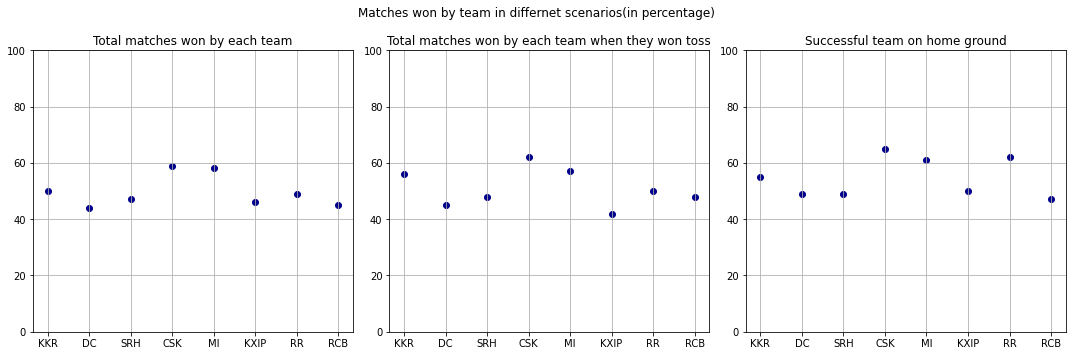

In [58]:


fig = plt.figure(figsize=(15, 5))
plt.suptitle("Matches won by team in differnet scenarios(in percentage)")

def plot_team_wins(x, y, position, title):
    fig.add_subplot(1,3,position)
    plt.scatter(x=x, y=y, c='DarkBlue')
    plt.ylim(0, 100)
    plt.title(title)
    plt.grid()
    
## Total matches won by each team
team_names, win_percent = [], []
for name in set(short_names.values()):
    if name not in ["RPS", "GL", "PWI", "Kochi"]:
        team_names.append(name)
        total_matches_won = teams_no_of_wins['total_matches_won'][teams_no_of_wins['team'] == name].values[0]
        total_matches_played = teams_no_of_wins['total_matches_played'][teams_no_of_wins['team'] == name].values[0]
        win_percent.append(int((total_matches_won* 100)/total_matches_played))

plot_team_wins(team_names, win_percent, 1, 'Total matches won by each team')

## Total matches won by team when they won toss
team_names, win_percent = [], []
for name in set(short_names.values()):
    if name not in ["RPS", "GL", "PWI", "Kochi"]:
        team_names.append(name)
        winner_when_toss_won = teams_no_of_wins['winner_when_toss_won'][teams_no_of_wins['team'] == name].values[0]
        total_matches_toss_won = teams_no_of_wins['total_matches_toss_won'][teams_no_of_wins['team'] == name].values[0]
        win_percent.append(int((winner_when_toss_won* 100)/total_matches_toss_won))

plot_team_wins(team_names, win_percent, 2, 'Total matches won by each team when they won toss')


               
## Successful team on home ground 
team_names, win_percent = [], []
for name in set(short_names.values()):
    if name not in ["RPS", "GL", "PWI", "Kochi"]:
        team_names.append(name)
        total_matches_won = teams_no_of_wins['win_on_home_grounds'][teams_no_of_wins['team'] == name].values[0]
        total_matches_played = teams_no_of_wins['total_matches_played_in_home_ground'][teams_no_of_wins['team'] == name].values[0]
        win_percent.append(int((total_matches_won* 100)/total_matches_played))
        
plot_team_wins(team_names, win_percent, 3, 'Successful team on home ground')
plt.tight_layout()


## Succussful Venue for Defending or Chasing

In [59]:
season_summary = pd.read_csv("data/all_season_summary.csv")

venue_dict = {}
for row, data in season_summary.iterrows():
    if data['venue_name'] not in venue_dict:
        venue_dict[data['venue_name']] = {"successful_chased":0,"successful_defended":0 }
    if data['decision'] =='BOWL FIRST':
        if data['winner']==data['toss_won']:
            venue_dict[data['venue_name']]['successful_chased']+=1
        else:
            venue_dict[data['venue_name']]['successful_defended']+=1
    if data['decision'] =='BAT FIRST':
        if data['winner']==data['toss_won']:
            venue_dict[data['venue_name']]['successful_defended']+=1
        else:
            venue_dict[data['venue_name']]['successful_chased']+=1
            
for venue, data in season_summary.groupby('venue_name'):
    venue_dict[venue]['total_matches_played'] = len(data)
    venue_dict[venue]['successful_chase_percent'] = (venue_dict[venue]['successful_chased'] * 100)/len(data)
    venue_dict[venue]['successful_defend_percent'] = (venue_dict[venue]['successful_defended'] * 100)/len(data)
venue_data = pd.DataFrame(venue_dict)
venue_data = venue_data.T
venue_data

successful_chased  \
Sheikh Zayed Stadium, Abu Dhabi                                  16.0   
Dubai International Cricket Stadium                              14.0   
Sharjah Cricket Stadium                                          11.0   
MA Chidambaram Stadium, Chepauk, Chennai                         22.0   
Eden Gardens, Kolkata                                            47.0   
Wankhede Stadium, Mumbai                                         37.0   
Sawai Mansingh Stadium, Jaipur                                   32.0   
Arun Jaitley Stadium, Delhi                                      40.0   
M.Chinnaswamy Stadium, Bengaluru                                 44.0   
Rajiv Gandhi International Stadium, Uppal, Hyde...               37.0   
Punjab Cricket Association IS Bindra Stadium, M...               32.0   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...                7.0   
Maharashtra Cricket Association Stadium, Pune                    20.0   
Holkar Cricket Stadium, Indore                                    8.0   
Saurashtra Cricket Association Stadium, Rajkot                    7.0   
Green Park, Kanpur                                                4.0   
Shaheed Veer Narayan Singh International Stadiu...                4.0   
Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad                 6.0   
Brabourne Stadium, Mumbai                                         5.0   
JSCA International Stadium Complex, Ranchi                        5.0   
Barabati Stadium, Cuttack                                         3.0   
Himachal Pradesh Cricket Association Stadium, D...                4.0   
Nehru Stadium, Kochi                                              2.0   
Dr DY Patil Sports Academy, Mumbai                               10.0   
Vidarbha Cricket Association Stadium, Jamtha, N...                1.0   
Newlands, Cape Town                                               2.0   
St George's Park, Port Elizabeth                                  4.0   
Kingsmead, Durban                                                 7.0   
SuperSport Park, Centurion                                        8.0   
Buffalo Park, East London                                         1.0   
The Wanderers Stadium, Johannesburg                               5.0   
Diamond Oval, Kimberley                                           2.0   
Mangaung Oval, Bloemfontein                                       1.0   

                                                    successful_defended  \
Sheikh Zayed Stadium, Abu Dhabi                                    13.0   
Dubai International Cricket Stadium                                19.0   
Sharjah Cricket Stadium                                             7.0   
MA Chidambaram Stadium, Chepauk, Chennai                           35.0   
Eden Gardens, Kolkata                                              30.0   
Wankhede Stadium, Mumbai                                           36.0   
Sawai Mansingh Stadium, Jaipur                                     15.0   
Arun Jaitley Stadium, Delhi                                        34.0   
M.Chinnaswamy Stadium, Bengaluru                                   37.0   
Rajiv Gandhi International Stadium, Uppal, Hyde...                 27.0   
Punjab Cricket Association IS Bindra Stadium, M...                 24.0   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...                  6.0   
Maharashtra Cricket Association Stadium, Pune                      18.0   
Holkar Cricket Stadium, Indore                                      1.0   
Saurashtra Cricket Association Stadium, Rajkot                      3.0   
Green Park, Kanpur                                                  0.0   
Shaheed Veer Narayan Singh International Stadiu...                  2.0   
Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad                   6.0   
Brabourne Stadium, Mumbai                                           6.0   
JSCA International Stadium Complex, Ranchi                          2

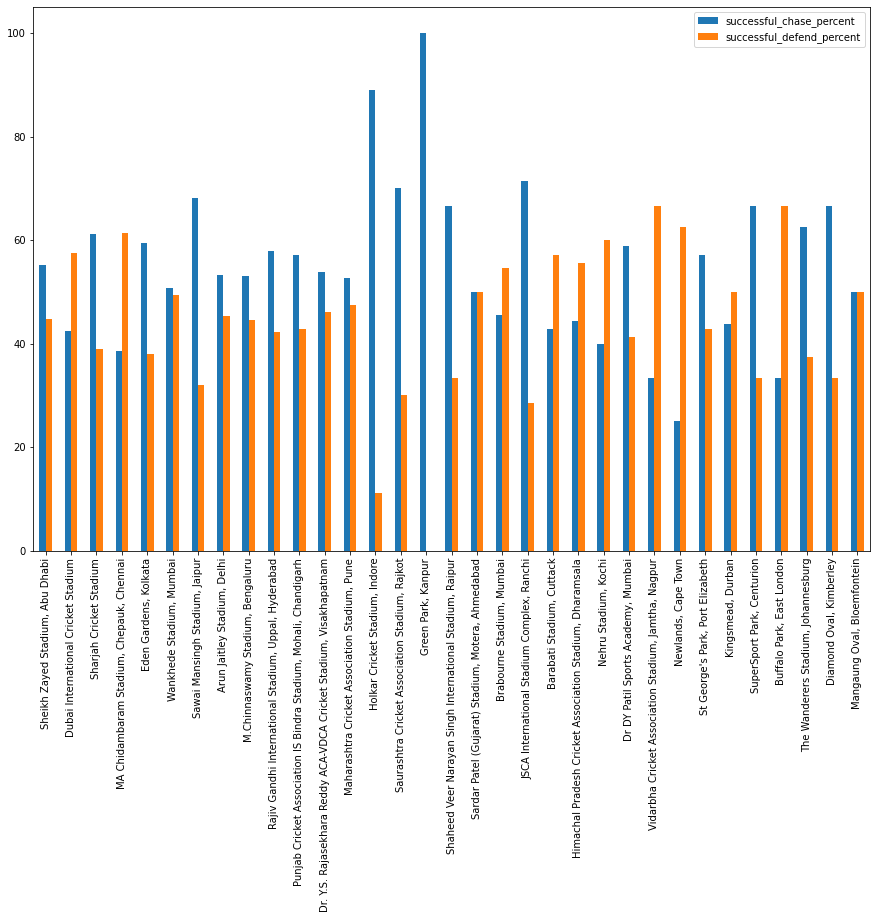

In [60]:
updated_data = venue_data[['successful_chase_percent' ,'successful_defend_percent']]
ax = updated_data.plot.bar(figsize=(15,10))


In [61]:
venue_data = venue_data[venue_data['total_matches_played']>15]
venue_data

successful_chased  \
Sheikh Zayed Stadium, Abu Dhabi                                  16.0   
Dubai International Cricket Stadium                              14.0   
Sharjah Cricket Stadium                                          11.0   
MA Chidambaram Stadium, Chepauk, Chennai                         22.0   
Eden Gardens, Kolkata                                            47.0   
Wankhede Stadium, Mumbai                                         37.0   
Sawai Mansingh Stadium, Jaipur                                   32.0   
Arun Jaitley Stadium, Delhi                                      40.0   
M.Chinnaswamy Stadium, Bengaluru                                 44.0   
Rajiv Gandhi International Stadium, Uppal, Hyde...               37.0   
Punjab Cricket Association IS Bindra Stadium, M...               32.0   
Maharashtra Cricket Association Stadium, Pune                    20.0   
Dr DY Patil Sports Academy, Mumbai                               10.0   
Kingsmead, Durban                                                 7.0   

                                                    successful_defended  \
Sheikh Zayed Stadium, Abu Dhabi                                    13.0   
Dubai International Cricket Stadium                                19.0   
Sharjah Cricket Stadium                                             7.0   
MA Chidambaram Stadium, Chepauk, Chennai                           35.0   
Eden Gardens, Kolkata                                              30.0   
Wankhede Stadium, Mumbai                                           36.0   
Sawai Mansingh Stadium, Jaipur                                     15.0   
Arun Jaitley Stadium, Delhi                                        34.0   
M.Chinnaswamy Stadium, Bengaluru                                   37.0   
Rajiv Gandhi International Stadium, Uppal, Hyde...                 27.0   
Punjab Cricket Association IS Bindra Stadium, M...                 24.0   
Maharashtra Cricket Association Stadium, Pune                      18.0   
Dr DY Patil Sports Academy, Mumbai                                  7.0   
Kingsmead, Durban                                                   8.0   

                                                    total_matches_played  \
Sheikh Zayed Stadium, Abu Dhabi                                     29.0   
Dubai International Cricket Stadium                                 33.0   
Sharjah Cricket Stadium                                             18.0   
MA Chidambaram Stadium, Chepauk, Chennai                            57.0   
Eden Gardens, Kolkata                                               79.0   
Wankhede Stadium, Mumbai                                            73.0   
Sawai Mansingh Stadium, Jaipur                                      47.0   
Arun Jaitley Stadium, Delhi                                         75.0   
M.Chinnaswamy Stadium, Bengaluru                                    83.0   
Rajiv Gandhi International Stadium, Uppal, Hyde...                  64.0   
Punjab Cricket Association IS Bindra Stadium, M...                  56.0   
Maharashtra Cricket Association Stadium, Pune                       38.0   
Dr DY Patil Sports Academy, Mumbai                                  17.0   
Kingsmead, Durban                                                   16.0   

                                                    successful_chase_percent  \
Sheikh Zayed Stadium, Abu Dhabi                                    55.172414   
Dubai International Cricket Stadium                                42.424242   
Sharjah Cricket Stadium                                            61.111111   
MA Chidambaram Stadium, Chepauk, Chennai                           38.596491   
Eden Gardens, Kolkata                                              59.493671   
Wankhede Stadium, Mumbai                                           50.684932   
Sawai Mansingh Stadium, Jaipur                                     68.085106   
Arun Jaitley Stadium, Delhi                      

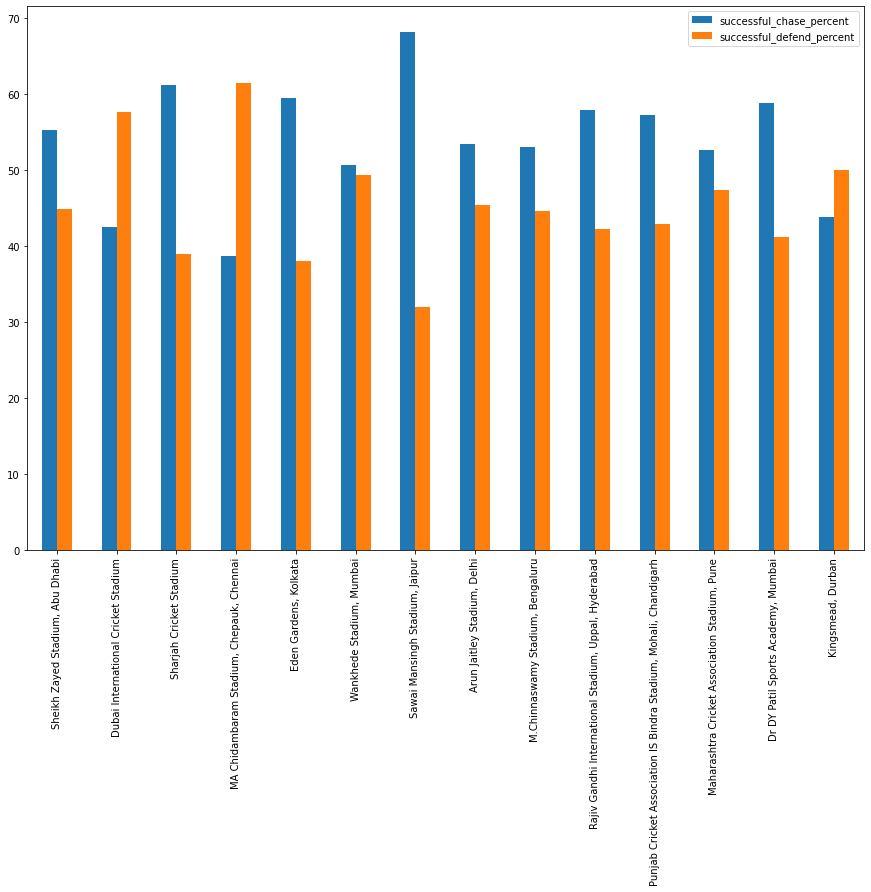

In [62]:
updated_data = venue_data[['successful_chase_percent' ,'successful_defend_percent']]
ax = updated_data.plot.bar(figsize=(15,10))

## Runs Scored by all teams in all seasons  

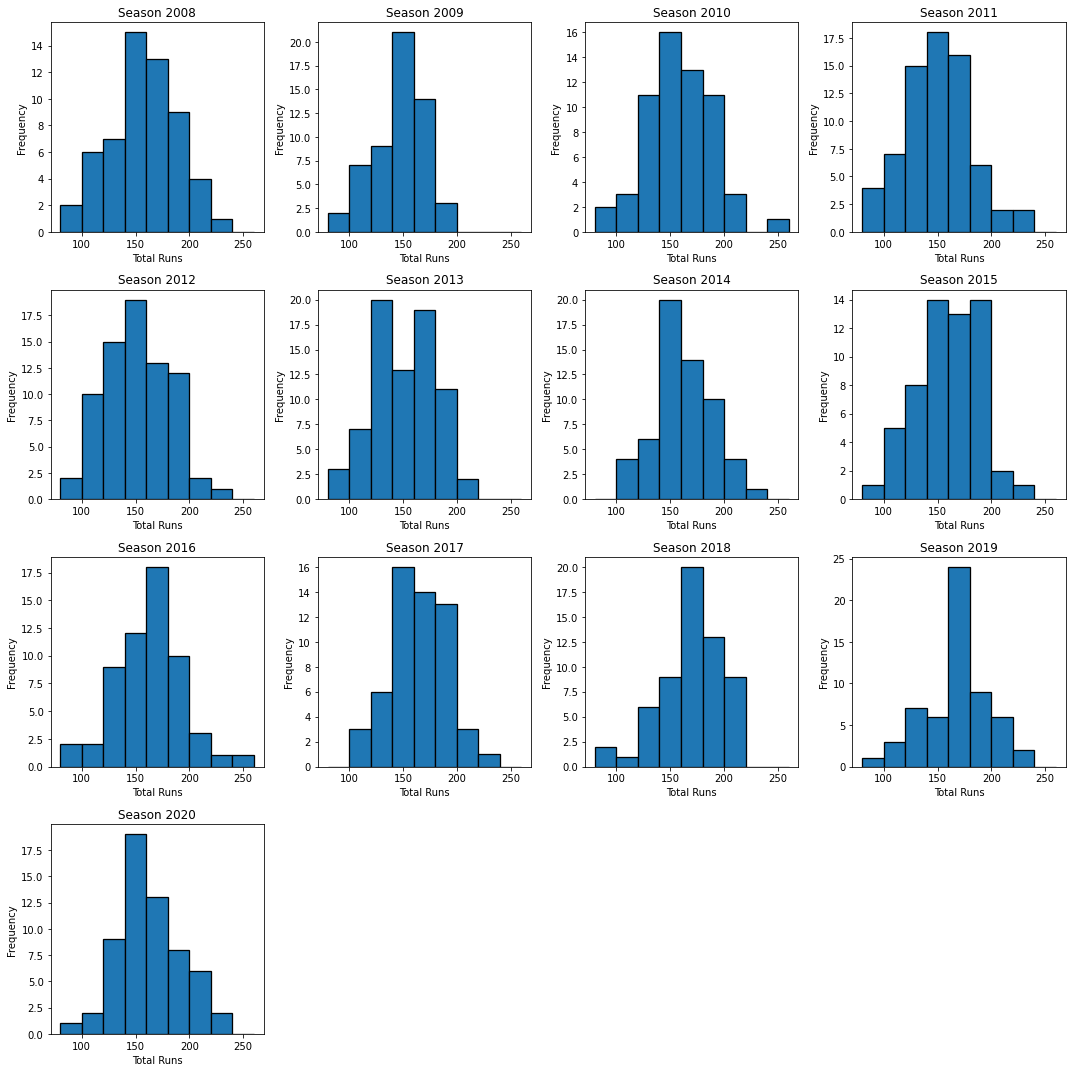

In [63]:
import pandas as pd
season_summary = pd.read_csv("data/all_season_summary.csv")
rows = 4
columns = 4
position=1
bins = [80, 100, 120 ,140, 160, 180, 200, 220, 240, 260]
fig = plt.figure(figsize=(15, 15))
for season, data in season_summary.groupby(['season']):
    fig.add_subplot(rows,columns,position)
    ax = data['home_runs'].plot.hist(by='home_runs', bins=bins, linewidth=1.3, edgecolor='black')
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Total Runs")
    ax.title.set_text(f"Season {season}")
    position+=1
fig.tight_layout()

## Stats of a each season

In [64]:
batting_card = pd.read_csv("data/all_season_batting_card.csv")
total_fours = batting_card.groupby('season')['fours'].sum()
total_fours

season
2008    1703.0
2009    1316.0
2010    1709.0
2011    1913.0
2012    1911.0
2013    2052.0
2014    1562.0
2015    1607.0
2016    1632.0
2017    1609.0
2018    1651.0
2019    1652.0
2020    1582.0
Name: fours, dtype: float64

In [65]:
batting_card = pd.read_csv("data/all_season_batting_card.csv")
total_sixes = batting_card.groupby('season')['sixes'].sum()
total_sixes

season
2008    622.0
2009    506.0
2010    585.0
2011    639.0
2012    731.0
2013    672.0
2014    714.0
2015    692.0
2016    638.0
2017    705.0
2018    872.0
2019    784.0
2020    734.0
Name: sixes, dtype: float64

In [66]:
batting_card = pd.read_csv("data/all_season_batting_card.csv")
total_fours_team = batting_card.groupby(['season', 'current_innings'])['fours'].sum()
total_fours_team

season  current_innings
2008    CSK                244.0
        DC                 218.0
        KKR                162.0
        KXIP               231.0
        MI                 197.0
                           ...  
2020    KXIP               179.0
        MI                 222.0
        RCB                176.0
        RR                 171.0
        SRH                213.0
Name: fours, Length: 108, dtype: float64

In [67]:
batting_card = pd.read_csv("data/all_season_batting_card.csv")
total_sixes_team = batting_card.groupby(['season', 'current_innings'])['sixes'].sum()
total_sixes_team

season  current_innings
2008    CSK                 86.0
        DC                  54.0
        KKR                 75.0
        KXIP                95.0
        MI                  76.0
                           ...  
2020    KXIP                98.0
        MI                 137.0
        RCB                 66.0
        RR                 105.0
        SRH                 79.0
Name: sixes, Length: 108, dtype: float64

In [68]:
# boundaries_data = batting_card.groupby(['season','current_innings']).agg({'fours':'sum','sixes':'sum'}).reset_index()
# boundaries_data = boundaries_data.set_index('current_innings')
# boundaries_data

In [69]:
batting_card = pd.read_csv("data/all_season_batting_card.csv")
batting_output = {}
for season, data in batting_card.groupby('season'):
    batting_output[season] = data.groupby('name')['runs'].sum().sort_values(ascending=False)[:5]

In [70]:
bowling_card = pd.read_csv("data/all_season_bowling_card.csv")
bowling_output = {}
for season, data in bowling_card.groupby('season'):
    bowling_output[season] = data.groupby('name')['wickets'].sum().sort_values(ascending=False)[:5]

In [71]:
# season_boundaries_data = {}
# for season, data in boundaries_data.groupby('season'):
#     season_boundaries_data[season] = data[['fours', 'sixes']]

In [72]:
points_table = pd.read_csv("data/points_table.csv")
team_rankings = {}
for season, data in points_table.groupby('season'):
    team_rankings[season]=data

In [116]:
most_valuable_player = {2008 : 'Shane Watson',
                        2009 : 'Adam Gilchrist',
                        2010 : 'Sachin Tendulkar',
                        2011 : 'Chris Gayle',
                        2012 : 'Sunil Narine',
                        2013 : 'Shane Watson',
                        2014 : 'Glenn Maxwell',
                        2015 : 'Andre Russell',
                        2016 : 'Virat Kohli',
                        2017 : 'Ben Stokes',
                        2018 : 'Sunil Narine',
                        2019 : 'Andre Russell',
                        2020 : 'Jofra Archer'}

emerging_player = {2008 : 'Shreevats Goswami',
                   2009 : 'Rohit Sharma',
                   2010 : 'Saurabh Tiwary',
                   2011 : 'Iqbal Abdulla',
                   2012 : 'Mandeep Singh',
                   2013 : 'Sanju Samson',
                   2014 : 'Axar Patel',
                   2015 : 'Shreyas Iyer',
                   2016 : 'Mustafizur Rahman',
                   2017 : 'Basil Thampi',
                   2018 : 'Rishabh Pant',
                   2019 : 'Shubman Gill',
                   2020 : 'Devdutt Padikkal'}
fair_play =  {2008 : 'CSK',
                   2009 : 'KXIP',
                   2010 : 'CSK',
                   2011 : 'CSK',
                   2012 : 'RR',
                   2013 : 'CSK',
                   2014 : 'CSK',
                   2015 : 'CSK',
                   2016 : 'SRH',
                   2017 : 'GL',
                   2018 : 'MI',
                   2019 : 'SRH',
                   2020 : 'MI'}


Input a season to visualize stats of that season 2010


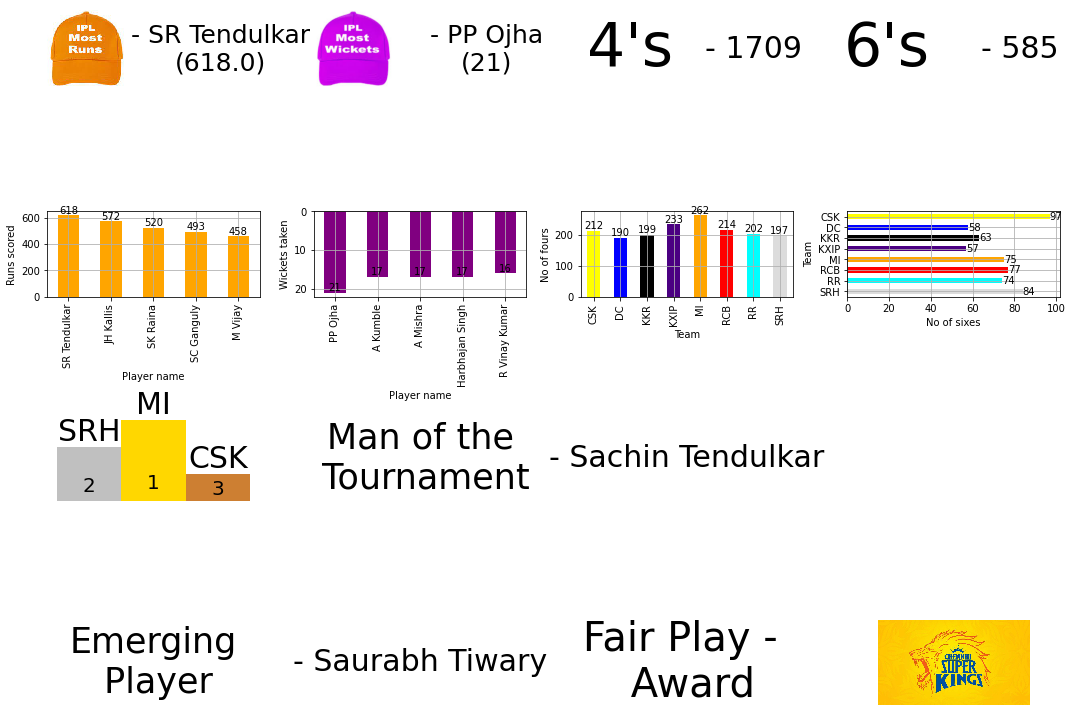

In [140]:
season = int(input("Input a season to visualize stats of that season"))

color_discrete_map={'CSK':'yellow', 'MI':'blue', 'KKR':'black', 'DC':'indigo', 'SRH':'orange', 'RCB':'red', 'RR':'cyan', 'KXIP':'Gainsboro'}

rows = 4
columns= 8
fig = plt.figure(figsize=(5, 5))
fig.set_size_inches(20,20)

plt.subplots_adjust(wspace= 0, hspace= 0)

image1 = plt.imread("images/orange cap.jpeg")
image2 = plt.imread("images/purple_cap.jpeg")

fig.add_subplot(rows,columns,1) 
plt.imshow(image1, interpolation='nearest')
plt.axis('off')

fig.add_subplot(rows, columns,2) 
plt.text(0.5, 0.5,f"- {batting_output[season].index[0]}\n({batting_output[season][0]})", fontsize=25,
         horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,3) 
plt.imshow(image2)
plt.axis('off')

fig.add_subplot(rows, columns,4) 
plt.text(0.5, 0.5,f"- {bowling_output[season].index[0]}\n({bowling_output[season][0]})", fontsize=25,
         horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,5)
plt.text(0.5, 0.5," 4's", fontsize=60, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,6)
plt.text(0.5, 0.5,f"- {int(total_fours[season])}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,7)
plt.text(0.5, 0.5,"6's", fontsize=60, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,8) 
plt.text(0.5, 0.5,f"- {int(total_sixes[season])}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(9, 10))
ax = batting_output[season].plot.bar(figsize=(15,10), grid=True, color='orange')
ax.set_xlabel("Player name")
ax.set_ylabel("Runs scored")
ax.bar_label(ax.containers[0])

fig.add_subplot(rows, columns,(11, 12)) 
ax = bowling_output[season].plot.bar(figsize=(15,10),grid=True, color='purple')
plt.gca().invert_yaxis()
ax.set_xlabel("Player name")
ax.set_ylabel("Wickets taken")
ax.bar_label(ax.containers[0])

fig.add_subplot(rows, columns,(13, 14)) 
ax = total_fours_team[season].plot.bar(figsize=(15,10),grid=True, color=color_discrete_map.values())
ax.set_xlabel("Team")
ax.set_ylabel("No of fours")
ax.bar_label(ax.containers[0])


fig.add_subplot(rows, columns,(15, 16))
ax = total_sixes_team[season].plot.barh(figsize=(15,10),grid=True, color=color_discrete_map.values())
ax.set_ylabel("Team")
ax.set_xlabel("No of sixes")
ax.invert_yaxis()
ax.bar_label(ax.containers[0])

ax = fig.add_subplot(rows, columns, (17, 18))
top_teams = team_rankings[season]['short_name'][:3].to_list()
updated_top_teams = [top_teams[1], top_teams[0], top_teams[2]]
# plt.scatter(x=team_rankings[season]['name'], y=team_rankings[2008]['rank'], c='DarkBlue')
# plt.ylim(0, 8)
# plt.xticks(rotation = 90)

bar_plot = plt.bar([1, 2, 3], [2, 3, 1], color = ['#C0C0C0', '#FFD700', '#CD7F32'],width=1.0)
labels = [2, 1, 3]
plt.axis('off')
# ax.set_xlabel("Top 3 teams of the season", loc='center')
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                labels[idx], ha='center', va='bottom', fontsize=20)
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                updated_top_teams[idx], ha='center', va='bottom', fontsize=30)

autolabel(bar_plot)

fig.add_subplot(rows, columns,(19, 20))
plt.text(0.5, 0.5,"Man of the\n Tournament", fontsize=35, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(21, 22))
plt.text(0.5, 0.5,f"- {most_valuable_player[season]}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

# fig.add_subplot(rows, columns,(19, 20))
# plt.text(0.5, 0.5,"Man of the\n Tournament", fontsize=40, horizontalalignment='center',verticalalignment='center')
# plt.axis('off')

# fig.add_subplot(rows, columns,(21, 22))
# plt.text(0.5, 0.5,f"- {most_valuable_player[season]}", fontsize=30, horizontalalignment='center',verticalalignment='center')
# plt.axis('off')

fig.add_subplot(rows, columns,(25, 26))
plt.text(0.5, 0.5,"Emerging\n Player", fontsize=35, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(27, 28))
plt.text(0.5, 0.5,f"- {emerging_player[season]}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(29, 30))
plt.text(0.5, 0.5,"Fair Play - \n Award", fontsize=40, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

# fig.add_subplot(rows, columns,(31, 32))
# plt.text(0.5, 0.5,f"- {fair_play[season]}", fontsize=30, horizontalalignment='center',verticalalignment='center')
# plt.axis('off')

fig.add_subplot(rows,columns,(31, 32))
image = plt.imread(team_logos[fair_play[season]])
plt.imshow(image, interpolation='nearest')
plt.axis('off')


# fig.add_subplot(rows, columns,23)
# plt.text(0.5, 0.5,"Fair Play\n award", fontsize=20, horizontalalignment='center',verticalalignment='center')
# plt.axis('off')

# fig.add_subplot(rows, columns,24)
# plt.text(0.5, 0.5,emerging_player[season], fontsize=20, horizontalalignment='center',verticalalignment='center')
# plt.axis('off')

plt.grid()
fig.tight_layout()


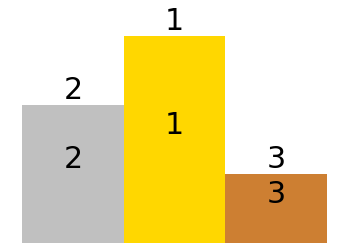

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bar_plot = plt.bar([1, 2, 3], [2, 3, 1], color = ['#C0C0C0', '#FFD700', '#CD7F32'],width=1.0)
labels = [2, 1, 3]
plt.axis('off')
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                labels[idx], ha='center', va='bottom', fontsize=30)
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                labels[idx], ha='center', va='bottom', fontsize=30)

autolabel(bar_plot)


# ax.text(0.5, 0,5, '2', ha='center', va='bottom', rotation=90)
